In [3]:
### Homework 2 Charles Voigt
#Housekeeping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly, sklearn_sm)
from sklearn.model_selection import train_test_split, cross_validate, LeaveOneOut
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures


# Question 14 (Chapter 4)

In [4]:
#Part a
Auto = load_data('Auto')
mpg01 = (Auto['mpg'] > Auto['mpg'].median()).astype(int)
Auto['mpg01'] = mpg01

In [5]:
#Part b
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0


C:\Users\cvoig\AppData\Local\Temp\ipykernel_14460\335544676.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[i].boxplot([Auto[Auto['mpg01'] == 0][col], Auto[Auto['mpg01'] == 1][col]], labels=['mpg01=0', 'mpg01=1'])
C:\Users\cvoig\AppData\Local\Temp\ipykernel_14460\335544676.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[i].boxplot([Auto[Auto['mpg01'] == 0][col], Auto[Auto['mpg01'] == 1][col]], labels=['mpg01=0', 'mpg01=1'])
C:\Users\cvoig\AppData\Local\Temp\ipykernel_14460\335544676.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[i].boxplot([Auto[Auto['mpg01'] == 0][col], Auto[Auto['mpg01'] 

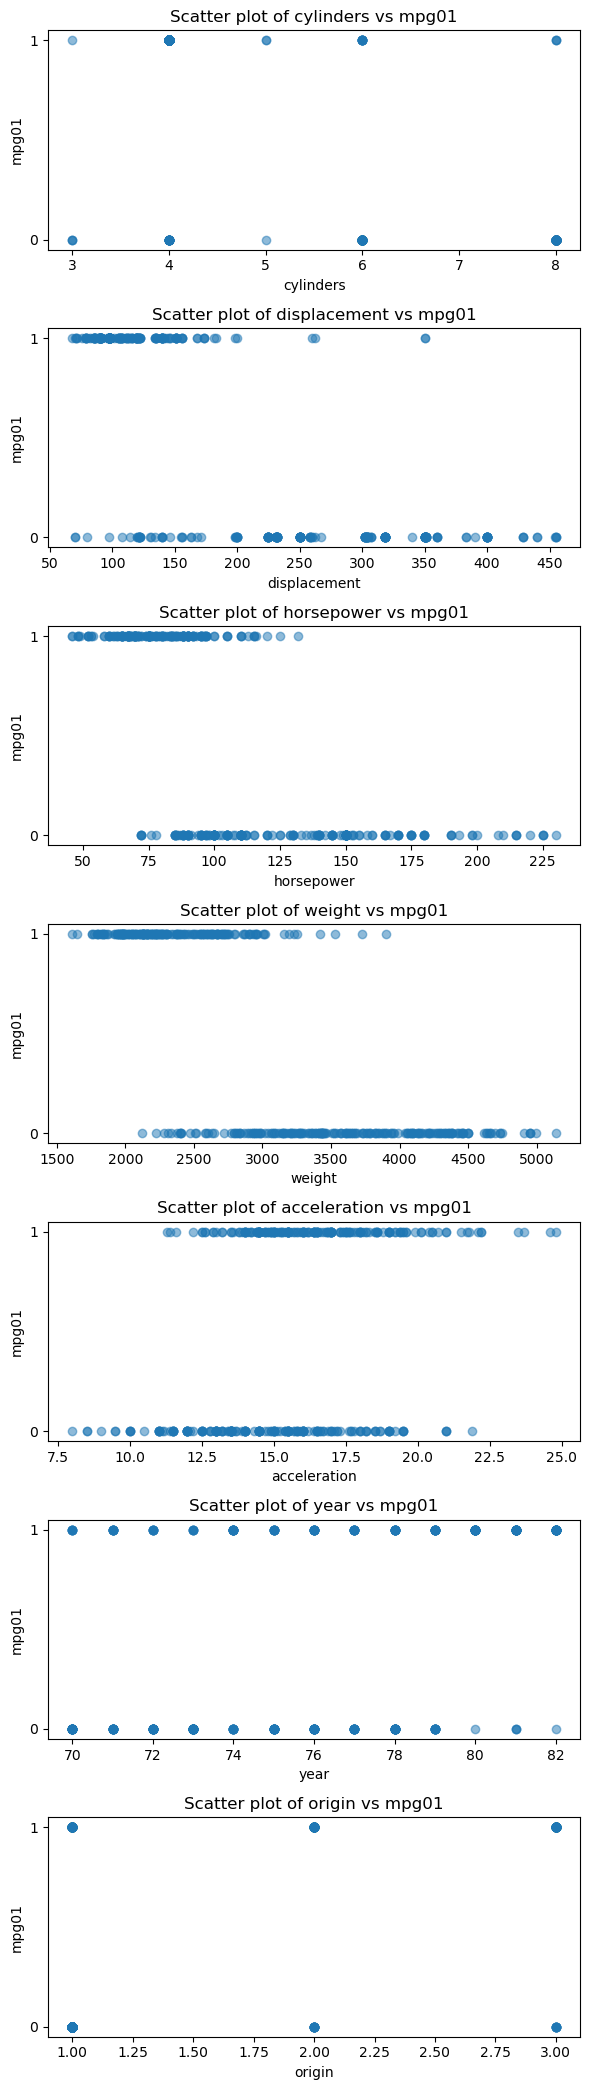

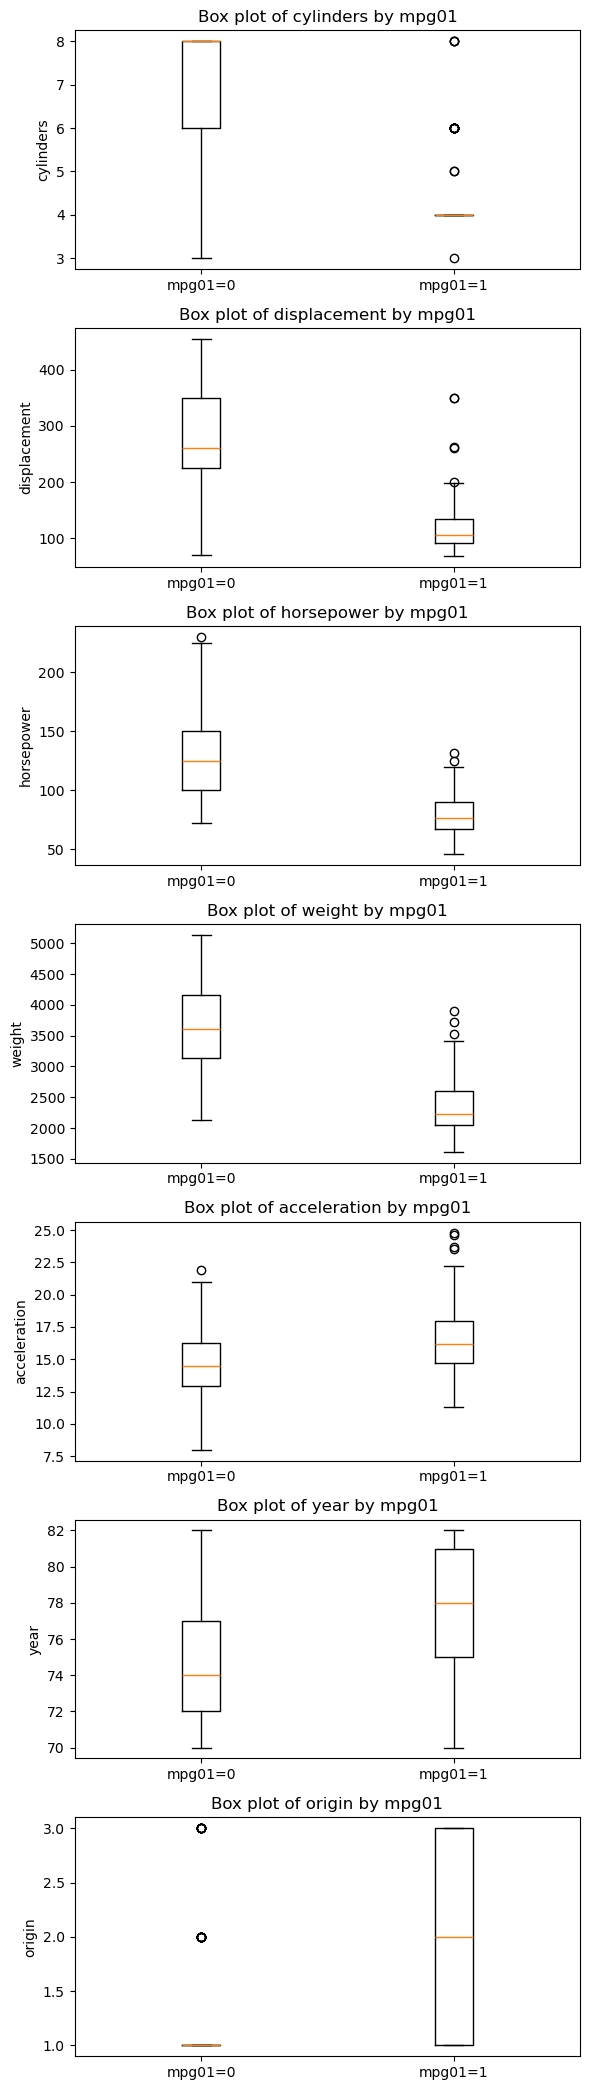

In [6]:
#Part b (continued)
# I think it may be useful to graph the relationships between cylinders, displacement, horsepower, weight, acceleration, year, and origin against mp01 to graphically investigate associations between them.
plot_columns = [col for col in Auto.columns if col not in ['name', 'mpg', 'mpg01']]

fig, axs = plt.subplots(len(plot_columns), 1, figsize=(6, 3 * len(plot_columns)))
for i, col in enumerate(plot_columns):
    axs[i].scatter(Auto[col], Auto['mpg01'], alpha=0.5)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('mpg01')
    axs[i].set_title(f'Scatter plot of {col} vs mpg01')
    axs[i].set_yticks([0, 1])
plt.tight_layout()

#Box Plots
fig, axs = plt.subplots(len(plot_columns), 1, figsize=(6, 3 * len(plot_columns)))
for i, col in enumerate(plot_columns):
    axs[i].boxplot([Auto[Auto['mpg01'] == 0][col], Auto[Auto['mpg01'] == 1][col]], labels=['mpg01=0', 'mpg01=1'])
    axs[i].set_title(f'Box plot of {col} by mpg01')
    axs[i].set_ylabel(col)
plt.tight_layout()

#### Part b Discussion

From the scatter plots, it can be seen that displacement, horsepower, weight, and acceleration appear to have some association with mpg01 and are therefore useful in predicting mpg01. The box plots reveal that year may also be a useful predictor for mpg01.

In [7]:
#Part c
choice_columns = ['displacement', 'horsepower', 'weight', 'year']
X_train, X_test, y_train, y_test = train_test_split(Auto[choice_columns], Auto['mpg01'], test_size=0.3, random_state=42)

In [8]:
#Part d
choice_columns = ['displacement', 'horsepower', 'weight', 'year']
X_train, X_test, y_train, y_test = train_test_split(Auto[choice_columns], Auto['mpg01'], test_size=0.3, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

lda_accuracy = accuracy_score(y_test, lda_pred)
lda_error = 1 - lda_accuracy

print(f'LDA Accuracy: {lda_accuracy:.4f}, LDA Test Error Rate: {lda_error:.4f}')

LDA Accuracy: 0.8475, LDA Test Error Rate: 0.1525


The LDA test error rate is 15.25%

In [9]:
#Part e
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)

qda_accuracy = accuracy_score(y_test, qda_pred)
qda_error = 1 - qda_accuracy
print(f'QDA Accuracy: {qda_accuracy:.4f}, QDA Test Error Rate: {qda_error:.4f}')

QDA Accuracy: 0.8644, QDA Test Error Rate: 0.1356


The QDA test error rate is 13.56%

In [10]:
#Part f
logit = sm.Logit(y_train, sm.add_constant(X_train))
result = logit.fit()
logit_pred = result.predict(sm.add_constant(X_test))

logit_accuracy = accuracy_score(y_test, (logit_pred > 0.5).astype(int))
logit_error = 1 - logit_accuracy
print(f'Logistic Regression Accuracy: {logit_accuracy:.4f}, Logistic Regression Test Error Rate: {logit_error:.4f}')

Optimization terminated successfully.
         Current function value: 0.189532
         Iterations 9
Logistic Regression Accuracy: 0.8729, Logistic Regression Test Error Rate: 0.1271


The Logit test error rate is 12.71%

In [11]:
#Part g
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_error = 1 - gnb_accuracy
print(f'Naive Bayes Accuracy: {gnb_accuracy:.4f}, Naive Bayes Test Error Rate: {gnb_error:.4f}')

Naive Bayes Accuracy: 0.8644, Naive Bayes Test Error Rate: 0.1356


The Naive Bayes test error rate is 13.56%

In [12]:
#Part h
k_values = [1, 3, 5, 7, 10, 20]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    knn_error = 1 - knn_accuracy
    print(f'KNN (k={k}) Accuracy: {knn_accuracy:.4f}, KNN (k={k}) Test Error Rate: {knn_error:.4f}')

KNN (k=1) Accuracy: 0.8475, KNN (k=1) Test Error Rate: 0.1525
KNN (k=3) Accuracy: 0.8644, KNN (k=3) Test Error Rate: 0.1356
KNN (k=5) Accuracy: 0.8390, KNN (k=5) Test Error Rate: 0.1610
KNN (k=7) Accuracy: 0.8305, KNN (k=7) Test Error Rate: 0.1695
KNN (k=10) Accuracy: 0.8305, KNN (k=10) Test Error Rate: 0.1695
KNN (k=20) Accuracy: 0.8220, KNN (k=20) Test Error Rate: 0.1780


My test error rates for KNN (where k is 1, 3, 5, 7, 10, 20) are 15.25%, 13.56%, 16.10%, 16.95%, 16.95%, and 17.80%, respectively. The model seems to perform best on this data set when k = 3.

# Question 8 Chapter 5

In [13]:
#Part a
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

#### Part a Discussion

In this data set, n refers to the number of observations (100), and p refers to the number of predictors (1). The equation for the model is this: 
$$
y_i = x_i - 2x_i^2 + \varepsilon_i
$$

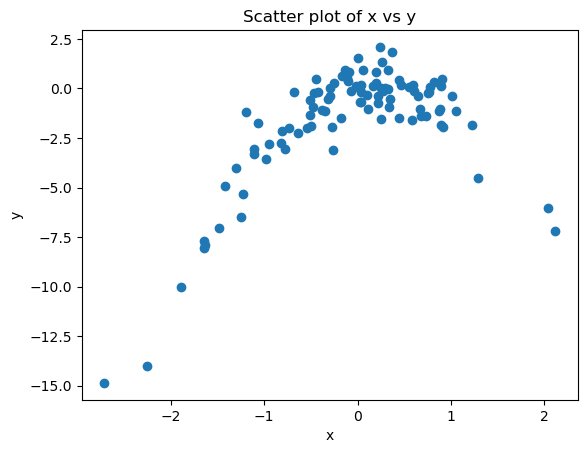

In [14]:
#Part b
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x vs y')
plt.show()

#### Part b Discussion
This plot shows that the relationship between X and Y is polynomial degree 2. This is aligned with the model equation, which is a degree 2 polynomial.

In [15]:
#Part c
np.random.seed(12345)

cv_errors = {1: [], 2: [], 3: [], 4: []}
loo = LeaveOneOut()
for train_index, test_index in loo.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for degree in range(1, 5):
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        X_test_poly = poly.transform(X_test.reshape(-1, 1))
        
        model = sm.OLS(y_train, X_train_poly).fit()
        y_pred = model.predict(X_test_poly)
        
        cv_errors[degree].append((y_test[0] - y_pred[0])**2)
mean_cv_errors = {degree: np.mean(errors) for degree, errors in cv_errors.items()}
for degree, error in mean_cv_errors.items():
    print(f'Degree {degree} CV Error: {error:.4f}')


Degree 1 CV Error: 6.6330
Degree 2 CV Error: 1.1229
Degree 3 CV Error: 1.3018
Degree 4 CV Error: 1.3324


In [16]:
#Part d
np.random.seed(54321)

cv_errors = {1: [], 2: [], 3: [], 4: []}
loo = LeaveOneOut()
for train_index, test_index in loo.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for degree in range(1, 5):
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        X_test_poly = poly.transform(X_test.reshape(-1, 1))
        
        model = sm.OLS(y_train, X_train_poly).fit()
        y_pred = model.predict(X_test_poly)
        
        cv_errors[degree].append((y_test[0] - y_pred[0])**2)
mean_cv_errors = {degree: np.mean(errors) for degree, errors in cv_errors.items()}
for degree, error in mean_cv_errors.items():
    print(f'Degree {degree} CV Error: {error:.4f}')

Degree 1 CV Error: 6.6330
Degree 2 CV Error: 1.1229
Degree 3 CV Error: 1.3018
Degree 4 CV Error: 1.3324


#### Part c & d Discussion

Using a different seed for the LOOCV will yield the same results because LOOCV will use each observation once as the test data every time. While the seeds are different, this only affects the order of the observations, not the data set itself. The coefficients remain the same and thus the LOOCV results will not change based on seed.

#### Part e

The degree 2 model had the lowest LOOCV error. This is what I expected, as the underlying data was a degree 2 relationship, thus the error will be smallest when fitting a model to the data which is also polynomial degree 2.

In [17]:
#Part f
for degree in range(1, 5):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    
    model = sm.OLS(y, X_poly).fit()
    print(f'Degree {degree} Model Summary:')
    print(model.summary())

Degree 1 Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           1.04e-09
Time:                        10:20:10   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650      0

#### Part f Discussion
The significance of the coefficients from the different model specifications are aligned with the results from cross validation. The t statistics on the coefficients of x1 and x2 are largest (in magnitude) when using the degree 2 polynomial specification. When using other models, the significance shrinks, suggesting that the fit may not be as good. Also note that the $R^2$ increases from degree 1 to degree 2 specifications, while there is no increase from degree 2 to 3 or 3 to 4.

# Chapter 6 Question 1

We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain p + 1 models, containing 0, 1, 2, ... , p predictors. Explain your answers.

#### Part a
Best subset selection will have the smallest training RSS because it will choose the best (smallest RSS) model given all possible combinations of k predictors. The drawback is that it is far more computationally intensive than forward and backward stepwise selection, which minimize RSS by adding/subtracting variables in order of significance, which  does not always achieve an optimal result.

#### Part b

It is not possible to determine which model with k predictors will have the smallest test RSS. If the value of  p is very large than the best subset selection method may suffer from overfitting on the training data, and thus have a larger test RSS than forward or backward subset selection.

#### Part c
i. True - forward stepwise selection will always choose predictors in order, so all predictors in the k-variable model will be a subset of the predictors in the (k+1)-variable model.

ii. True - backward stepwise selection will always remove predictors in order of least significance, so the predictors in the k-variable model will be a subset of the predictors in the (k+1)-variable model.

iii. False - backward stepwise selection removes the worst predictors in order, and forward stepwise selection adds the best predictors in order. But backward selection will not add predictors back in and forward selection will not remove predictors which have already been added. This means that the predictors identified in the (k+1) variable model identified by forward stepwise selection will not necessarily include all of the predictors identified in the k-variable model identified by backward stepwise selection.

iv. False - backward stepwise selection removes the worst predictors in order, and forward stepwise selection adds the best predictors in order. But backward selection will not add predictors back in and forward selection will not remove predictors which have already been added. This means that the predictors identified in the (k+1) variable model identified by backward stepwise selection will not necessarily include all of the predictors identified in the k-variable model identified by forward stepwise selection.

v. False - best subset selection seeks to minimize the training RSS in each $M_0$ ... $M_p$ models by comparing all possible combinations of predictors for each model $M$. This means that the combination of predictors that minimizes RSS for $M_k$ may be completely different (not a subset) of the predictors which minimizes the RSS for $M_{(k+1)}$.

# Chapter 6 Question 2

#### Part a
The Lasso, relative to least squares, is:

iii. Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance. 

This is because by adjusting the $\lambda$, some of the coefficients in the lasso model will be shrunk to 0. This increases the bias of the lasso model compared to least squares but decreases the variance, which improves the prediction accuracy because the additional bias added by the lasso model is far less than the decrease in variance it achieves.

#### Part b

The ridge, regression, relative to least squares is:

iii. Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance. 

This is because by adjusting the $\lambda$, some of the coefficients in the ridge regression model will be shrunk towards 0. So, in the same way as lasso, it can be beneficial for prediction accuracy when the increase in bias is far smaller than the decrease in variance associated with introducing the $\lambda$ penalty. The key difference is that ridge regression will not allow coefficients to be shrunk all the way to 0, which means comparitively it can suffer from interpretability issues and can be much more computationally intensive than lasso.

#### Part c

Non-linear methods, relative to least squares are: 

ii. More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

Non-linear methods are more flexible than least squares because they are able to capture non linear signals in the underlying data which least squares is not able to. The tradeoff is that the bias in the model will decrease, but the variance will increase. Of course, the prediction accuracy of non-linear methods will be greater than least squares when adding non-linearity decreases the bias far more than the variance increases.